In [1]:
#import all neceassary library
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from mne.preprocessing import ICA,read_ica

In [27]:
#read the ICA filtered data file from the folder
sample_data_raw_file=('C:/Users/user/Desktop/ICA/03062019 3_ica.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw_temp=raw.copy().crop(600., 620.) #Copy the raw data and crop the 30 sec data basically skype call
raw_ch = raw_temp.pick_channels(['FC2' ]) # select only one channel

Opening raw data file C:/Users/user/Desktop/ICA/03062019 3_ica.fif...
    Range : 0 ... 260479 =      0.000 ...  2034.992 secs
Ready.
Reading 0 ... 260479  =      0.000 ...  2034.992 secs...


<ipython-input-27-fa7b7ddc4069>:3: RuntimeWarning: This filename (C:/Users/user/Desktop/ICA/03062019 3_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)


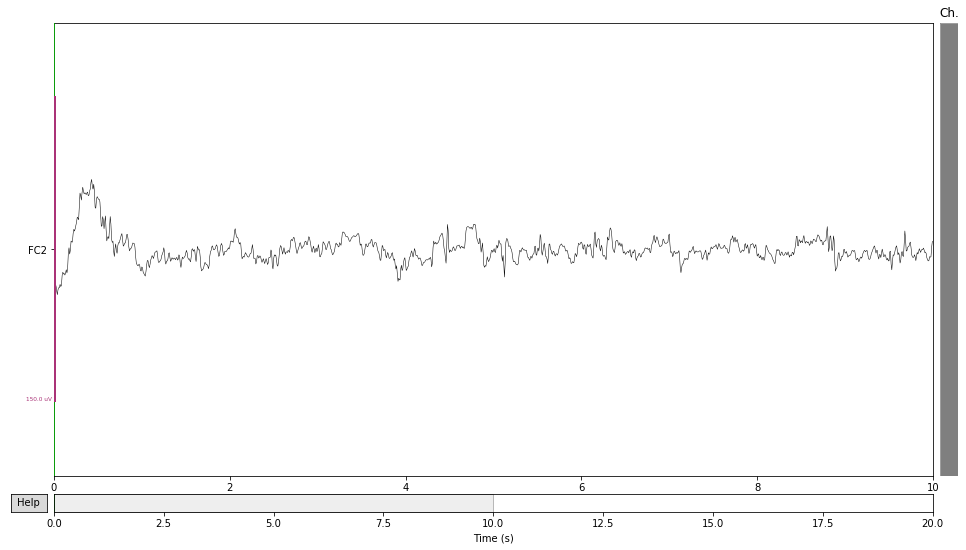

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 211 samples (1.648 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 

In [28]:
# EEG Bands are separated by using bandpass filter
raw_filt=raw_ch.copy()# copy the data
raw_filt.plot(scalings={"eeg": 75e-6})#plot FC1 

def filter(fmin, fmax):
    band=raw_filt.filter(fmin, fmax, fir_design='firwin')
    return band
Theta = filter(4., 8.)
Alpha = filter(13.,30.)
Beta  = filter(13.,30.)
Gamma = filter(30., 56.)

data shape ==>row,colm (1, 2561)
time shape ==>row,colm (2561,)


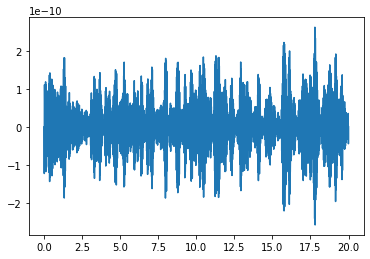

<class 'numpy.ndarray'>


In [29]:
data,times = Alpha[:] # extract data & times 
print('data shape ==>row,colm',data.shape)
print('time shape ==>row,colm',times.shape)
plt.plot(times, data.T)# take transpose of data
plt.show()
#print((data.size))
print(type(data))

In [30]:
#Signal windowing for tkeo.

fs = 128

window_hop_length= 0.04 #40ms hop length
overlap=int(fs*window_hop_length) #number of overlap
print(overlap,'Overlap')

window_size=0.025 #25 ms window size,
framesize=int(window_size*fs) #number of frame
length=(data.size)       #define length(size) of signal
print(framesize,'frame size')

number_of_frames=int(length/overlap)
print(type(number_of_frames))
print("number_of_frames=",number_of_frames)

frames=np.ndarray((number_of_frames,framesize))#np.ndarray
#print(frames[110])
print('frames len',len(frames))
print((frames))


5 Overlap
3 frame size
<class 'int'>
number_of_frames= 512
frames len 512
[[ 1.09803029e-311  1.09802801e-311  7.07156159e-320]
 [             nan  5.29239778e-260  2.01737825e+088]
 [ 3.32723396e-294 -1.02829771e-234  8.22865375e+044]
 ...
 [ 1.81455374e-184 -4.07592480e-303  9.25565802e-201]
 [-1.18674167e-205 -1.06957487e+136 -1.92729405e+207]
 [-2.32755740e+077  5.18850397e+260  1.15748778e-258]]


In [31]:
#KTE calculation:

tkeo = []
N =len(frames)
for i in range(0, N):
    if i == 0 or i == N - 1:
        tkeo.append(frames[i])
    else:
        tkeo.append((frames[i]**2) - (frames[i + 1] * frames[i - 1]))
tkeo =np.asarray(tkeo)
print('tkeo',tkeo)
print('tkeo size(samples)==',(tkeo.size))

tkeo [[ 1.09803029e-311  1.09802801e-311  7.07156159e-320]
 [             nan  0.00000000e+000  4.06981499e+176]
 [             nan -6.67943849e-138  6.77107426e+089]
 ...
 [ 8.69257891e-156 -2.24478519e+051              inf]
 [ 4.22347798e-107  1.14399041e+272              inf]
 [-2.32755740e+077  5.18850397e+260  1.15748778e-258]]
tkeo size(samples)== 1536


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


In [21]:
#Signal windowing for tkeo.

fs = 128

window_hop_length= 0.04 #40ms hop length
overlap=int(fs*window_hop_length) #number of overlap
print(overlap,'Overlap')

window_size=0.025 #25 ms window size,
framesize=int(window_size*fs) #number of frame
length=(tkeo.size)       #define length(size) of signal
print(framesize,'frame size')

number_of_frames=int(length/overlap)
print(type(number_of_frames))
print("number_of_frames=",number_of_frames)

frames=np.ndarray((number_of_frames,framesize))#np.ndarray
#print(frames[110])
print('frames len',len(frames))
print((frames))


5 Overlap
3 frame size
<class 'int'>
number_of_frames= 52096
frames len 52096
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [32]:
import numpy as geek
frames=geek.nan_to_num(tkeo) #remove the NAN and inf value from std
#print(len(std))
print(tkeo)

[[ 1.09803029e-311  1.09802801e-311  7.07156159e-320]
 [             nan  0.00000000e+000  4.06981499e+176]
 [             nan -6.67943849e-138  6.77107426e+089]
 ...
 [ 8.69257891e-156 -2.24478519e+051              inf]
 [ 4.22347798e-107  1.14399041e+272              inf]
 [-2.32755740e+077  5.18850397e+260  1.15748778e-258]]


In [33]:
kte_mu=np.mean(frames, axis=1) # calculate mean
#np.nanstd(frames)
print((kte_mu))

[ 7.32019438e-312  1.35660500e+176  2.25702475e+089  5.99231045e+307
  0.00000000e+000  0.00000000e+000              inf  5.99231045e+307
  5.27769381e+065 -3.77782588e+054  5.99231045e+307 -5.99231045e+307
              inf -5.99231045e+307  5.99231045e+307  1.49042600e+291
 -7.65040152e+093  2.58152234e+195 -2.88343243e+096  2.11719820e+296
  5.99231045e+307              inf  5.99231045e+307  1.29714321e+120
  5.67973831e+014  3.83930925e+193  2.03555744e+284  1.37652241e-035
 -1.32878454e+182  5.99231045e+307  5.99231045e+307 -5.99231045e+307
  5.99231045e+307  0.00000000e+000  5.99231045e+307 -1.74959859e-042
 -1.27351057e-001  7.24337618e+156 -2.82797905e+015  1.02727247e+239
  5.99231045e+307  6.18602416e+174  4.26200538e+254  5.99231045e+307
  5.99231045e+307              inf  5.99231045e+307              inf
 -5.99231045e+307  5.99231045e+307  5.99231045e+307  1.06321693e+203
  2.36222473e+117              inf  5.99231045e+307  5.02938976e+217
  6.09063735e+030 -1.78505017e+045

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


In [34]:
std = np.std(frames,axis=1)# calculate standard division
print(std)

[0.00000000e+000             inf 3.19191502e+089             inf
             inf             inf             inf             inf
 7.46378617e+065 5.34265259e+054             inf             inf
             inf             inf             inf             inf
 1.08193016e+094             inf 4.07778924e+096             inf
             inf             inf             inf 1.83443751e+120
 8.03236294e+014             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf 2.47430606e-042
 1.80101592e-001             inf 3.99936632e+015             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
 3.34069025e+117             inf             inf             inf
 8.61346195e+030 2.52444216e+045             inf             inf
             inf         

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: overflow encountered in subtract
  x = asanyarray(arr - arrmean)


In [35]:
kte_std=geek.nan_to_num(std)
print(kte_std)

[0.00000000e+000 1.79769313e+308 3.19191502e+089 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 7.46378617e+065 5.34265259e+054 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.08193016e+094 1.79769313e+308 4.07778924e+096 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.83443751e+120
 8.03236294e+014 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 2.47430606e-042
 1.80101592e-001 1.79769313e+308 3.99936632e+015 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.79769313e+308 1.79769313e+308 1.79769313e+308
 3.34069025e+117 1.79769313e+308 1.79769313e+308 1.79769313e+308
 8.61346195e+030 2.52444216e+045 1.79769313e+308 1.79769313e+308
 1.79769313e+308 1.797693

In [36]:
#KTE Logistic Coefficients is calculated over every frame.
c_kte = kte_mu/(1+np.exp(-kte_std)) #
print(c_kte)

[ 3.66009719e-312  1.35660500e+176  2.25702475e+089  5.99231045e+307
  0.00000000e+000  0.00000000e+000              inf  5.99231045e+307
  5.27769381e+065 -3.77782588e+054  5.99231045e+307 -5.99231045e+307
              inf -5.99231045e+307  5.99231045e+307  1.49042600e+291
 -7.65040152e+093  2.58152234e+195 -2.88343243e+096  2.11719820e+296
  5.99231045e+307              inf  5.99231045e+307  1.29714321e+120
  5.67973831e+014  3.83930925e+193  2.03555744e+284  1.37652241e-035
 -1.32878454e+182  5.99231045e+307  5.99231045e+307 -5.99231045e+307
  5.99231045e+307  0.00000000e+000  5.99231045e+307 -8.74799297e-043
 -6.93941111e-002  7.24337618e+156 -2.82797905e+015  1.02727247e+239
  5.99231045e+307  6.18602416e+174  4.26200538e+254  5.99231045e+307
  5.99231045e+307              inf  5.99231045e+307              inf
 -5.99231045e+307  5.99231045e+307  5.99231045e+307  1.06321693e+203
  2.36222473e+117              inf  5.99231045e+307  5.02938976e+217
  6.09063735e+030 -1.78505017e+045

In [ ]:
def eeg_tkeo(x):
    eeg = np.asarray(x)
    tkeo =np.copy(eeg)
    # Teager–Kaiser Energy operator
    tkeo[1:-1] = eeg[1:-1]*eeg[1:-1] - eeg[:-2]*eeg[2:]
    
    # correct the data in the extremities
    #tkeo[0], tkeo[-1] = tkeo[1], tkeo[-2]

    return(tkeo)
eeg_tkeo(data)
#print((eeg_tkeo))

In [ ]:
ps = np.abs(np.fft.fft(data))**2
#fs=128

freqs = np.fft.fftfreq(data.size, times)
idx = np.argsort(freqs)

print(freqs.shape)
plt.plot(freqs, ps.T)
plt.show()